In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('data/image/Cars_Dataset/test/Audi/23.jpg')


In [ ]:
cv.imshow('Audi',img)
cv.waitKey(0)

In [2]:
capture = cv.VideoCapture('data/video/files/Videos_around_cars/1.mp4')
while True:
    isTrue, frame = capture.read()
    cv.imshow('Video',frame)

    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.destroyAllWindows()

In [3]:
def rescaleFrame(frame,scale=0.2):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions=(width,height)
    return cv.resize(frame,dimensions, interpolation=cv.INTER_AREA)

capture = cv.VideoCapture('data/video/files/Videos_around_cars/1.mp4')
while True:
    isTrue, frame = capture.read()
    frame_resized= rescaleFrame(frame)
    cv.imshow('Video',frame)
    cv.imshow('Videoresized',frame_resized)


    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.destroyAllWindows()

In [6]:
blank = np.zeros((500,500,3),dtype='uint8')
cv.imshow('Blank',blank)
#blank[:]= 0,0,255
#cv.imshow('Red',blank)
#cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=3)
# Parameter thickness largeur du trait
# cv.filled permet d'avoir le rectangle remplie
# Shape (rectangle,circle,line) le cercle a pour position quelque chose de fixe
#blank.shape[0] taille
#cv.imshow('Rectangle',blank)

cv.putText(blank, 'Hello', (255,255), cv.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0),2)
cv.imshow('Text',blank)
cv.waitKey(0)

97

: 

In [17]:
img = cv.imread('data/image/Cars_Dataset/test/Audi/23.jpg')
cv.imshow('Audi',img)
#greyscale
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('Gray',gray)
#blur
blur=cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
cv.imshow('Blur',blur)
#Edge cascade
canny=cv.Canny(blur,125,175)
cv.imshow('Canny Edge',canny)

#dilating the image
dilated = cv.dilate(canny,(3,3),iterations=2)
cv.imshow('Dilated',dilated)

# Eroding
eroded = cv.erode(dilated,(7,7),iterations=3)
cv.imshow('eroded',eroded)

#resize
resized=cv.resize(img,(250,250),interpolation=cv.INTER_CUBIC)
cv.imshow('resized',resized)

#Cropping
cropped=img[40:100,0:100]
cv.imshow('cropped',cropped)
cv.waitKey(0)

97

In [20]:
#Image transformation

#Translation
def translate(img,x,y):
    transMat= np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img, transMat,dimensions)
# y -> DOWN
# -y -> UP
# -x -> LEFT
# x -> RIGHT
translated =translate(img,50,50)
cv.imshow('translated',translated)

#Rotation
def rotate(img,angle,rotPoint=None):
    (height,width)=img.shape[:2]
    if rotPoint is None:
        rotPoint =(width//2,height//2)
    
    rotMat = cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions= (width,height)
    return cv.warpAffine(img,rotMat,dimensions)

rotated=rotate(img,20)
cv.imshow('rotated',rotated)

#resizing
resized=cv.resize(img,(500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('resized',resized)

#flip
flip=cv.flip(img,1)
cv.imshow('flip',flip)

#Cropping
cropped=img[40:100,0:100]
cv.imshow('cropped',cropped)

cv.waitKey(0)


97

In [28]:
#Contours

gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

canny=cv.Canny(img,125,175)
cv.imshow('Canny Edge',canny)

#contours,hierarchies = cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
#print(f'{len(contours)} contour(s) found!')

ret, thresh = cv.threshold(gray,125,200,cv.THRESH_BINARY)
cv.imshow('thresh',thresh)
contours,hierarchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

blank = np.zeros(img.shape,dtype='uint8')
cv.imshow('Blank',blank)
cv.drawContours(blank,contours,-1,(0,0,255),2)
cv.imshow('Contours Drawn', blank)
cv.waitKey(0)


360 contour(s) found!


97

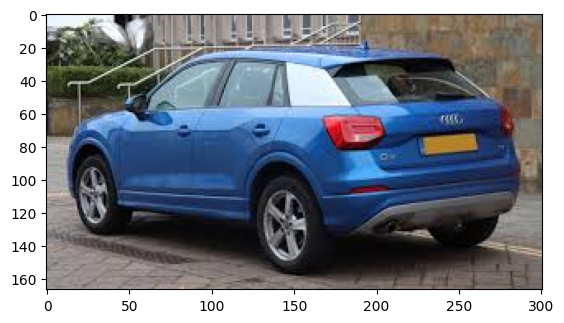

97

In [7]:
#Space
cv.imshow('img',img)

gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)

hsv= cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)

lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('hsv',lab)

rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv.imshow('rgb',rgb)


plt.imshow(rgb)
plt.show()
cv.waitKey(0)


In [15]:
# Color channel

blank = np.zeros(img.shape[:2],dtype='uint8')

cv.imshow('img',img)

b,g,r = cv.split(img)

blue=cv.merge([b,blank,blank])
red=cv.merge([blank,blank,r])
green=cv.merge([blank,g,blank])


cv.imshow('Blue',blue)
cv.imshow('Green',green)
cv.imshow('Red',red)

print(img.shape)
print(r.shape)
print(g.shape)
print(b.shape)

merged =cv.merge([b,g,r])
cv.imshow('merged',merged)



cv.waitKey(0)




(167, 301, 3)
(167, 301)
(167, 301)
(167, 301)


KeyboardInterrupt: 

In [5]:
#smoothing

#Averaging
cv.imshow('image',img)

average =cv.blur(img,(5,5))
cv.imshow('average',average)


gauss = cv.GaussianBlur(img,(7,7),0)
cv.imshow('gauss',gauss)

median= cv.medianBlur(img,3)
cv.imshow('median',median)

bilateral= cv.bilateralFilter(img,5,15,15)
cv.imshow('bilateral',bilateral)


cv.waitKey(0)


97

In [10]:
#bitwise operation
blank= np.zeros((400,400), dtype='uint8')
rectangle= cv.rectangle(blank.copy(), (30,30),(370,370),255,-1)
circle = cv.circle(blank.copy(), (200,200),200,255,-1)
cv.imshow('rectangle',rectangle)
cv.imshow('circle',circle)

bitwise_and= cv.bitwise_and(rectangle,circle)
cv.imshow('bitwise_and',bitwise_and)

bitwise_or= cv.bitwise_or(rectangle,circle)
cv.imshow('bitwise_or',bitwise_or)

bitwise_xor= cv.bitwise_xor(rectangle,circle)
cv.imshow('bitwise_xor',bitwise_xor)

bitwise_not= cv.bitwise_not(circle)
cv.imshow('bitwise_not',bitwise_not)

cv.waitKey(0)


97

In [15]:
#masking
blank= np.zeros(img.shape[:2], dtype='uint8')
cv.imshow('blank',blank)

mask = cv.circle(blank,(img.shape[1]//2,img.shape[0]//2),75,255,-1)
cv.imshow('mask',mask)


masked = cv.bitwise_and(img,img,mask=mask)
cv.imshow('Masked', masked)
cv.waitKey(0)


97

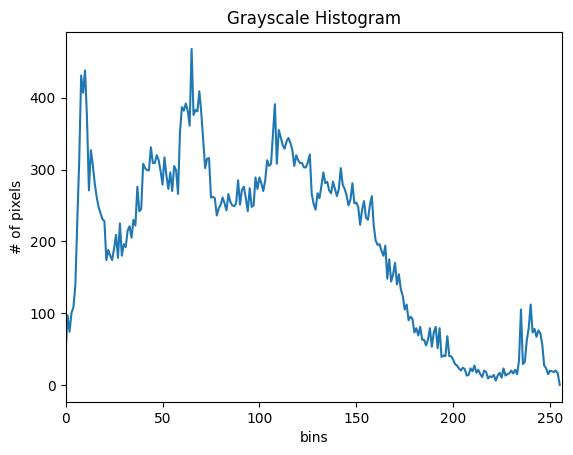

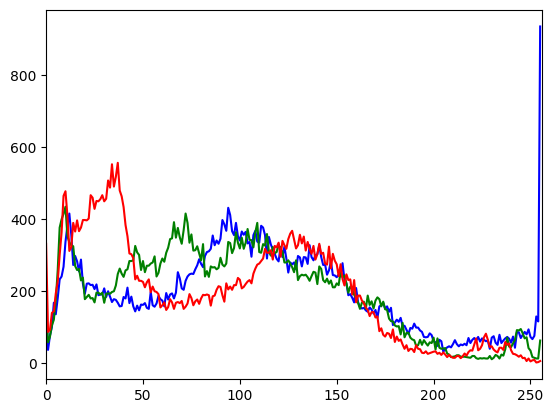

In [3]:
#histogram

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

gray_hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])

In [5]:
#Thresholding

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

threshold, thresh = cv.threshold(gray,150,255, cv.THRESH_BINARY)
cv.imshow('thresh',thresh)

threshold, thresh_inv = cv.threshold(gray,150,255, cv.THRESH_BINARY_INV)
cv.imshow('thresh_inv',thresh_inv)

adaptative_tresh = cv.adaptiveThreshold(gray,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,3)
cv.imshow('adaptative_tresh',adaptative_tresh)

cv.waitKey(0)

SyntaxError: '(' was never closed (2635683889.py, line 12)

In [9]:
#gradient

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('gray', gray)

lap = cv.Laplacian(gray,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('lap', lap)

#sobel
sobelx=cv.Sobel(gray,cv.CV_64F,1,0)
sobely=cv.Sobel(gray,cv.CV_64F,0,1)
combined=cv.bitwise_or(sobelx,sobely)
cv.imshow('sobelx', sobelx)
cv.imshow('sobely', sobely)
cv.imshow('combined', combined)

canny=cv.Canny(gray,150,175)
cv.imshow('canny',canny)


cv.waitKey(0)

97